# Part 3: Predictive Modeling

## 1. Read data

In [ ]:
#read data

import pandas as pd

df_part3 = pd.read_json('ultimate_data_challenge.json', keep_default_dates=True, convert_dates=['signup_date', 'last_trip_date'])
df_part3.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [288]:
df_part3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

All datatypes appear to be correct

In [289]:
df_part3.describe()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000,41878.000000,50000.000000,50000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,2014-01-16 13:04:20.352000,4.601559,1.074764,2014-04-19 08:02:04.992000256,8.849536,60.926084,5.796827,4.778158
min,0.000000,2014-01-01 00:00:00,1.000000,1.000000,2014-01-01 00:00:00,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2014-01-09 00:00:00,4.300000,1.000000,2014-02-14 00:00:00,0.000000,33.300000,2.420000,4.700000
50%,1.000000,2014-01-17 00:00:00,4.900000,1.000000,2014-05-08 00:00:00,0.000000,66.700000,3.880000,5.000000
75%,3.000000,2014-01-24 00:00:00,5.000000,1.050000,2014-06-18 00:00:00,8.600000,100.000000,6.940000,5.000000
max,125.000000,2014-01-31 00:00:00,5.000000,8.000000,2014-07-01 00:00:00,100.000000,100.000000,160.960000,5.000000
std,3.792684,NaN,0.617338,0.222336,NaN,19.958811,37.081503,5.707357,0.446652


## 2. Data Wrangling

In [290]:
#check for null values
df_part3.isnull().sum()/len(df_part3)

city                      0.00000
trips_in_first_30_days    0.00000
signup_date               0.00000
avg_rating_of_driver      0.16244
avg_surge                 0.00000
last_trip_date            0.00000
phone                     0.00792
surge_pct                 0.00000
ultimate_black_user       0.00000
weekday_pct               0.00000
avg_dist                  0.00000
avg_rating_by_driver      0.00402
dtype: float64

`avg_rating_by_driver` and `phone` has some missing values and the % of missingness is < 5% compared to total dataset for each of these variables we can simply impute values with the mean/median or mode.

`average_rating_of_driver` has ~16% missing values so we need to evaluate cautiously before we impute it with mean/mode/median


General missingness handling principle - <br>
1. If missingness is < 5%, simple imputation (mean, median, mode) is usually safe and unlikely to bias results.
2. If missingness is 5–10%, imputation is still acceptable but requires more caution.
3. If missingness is > 10%, consider advanced imputation methods or analyze the impact of missingness before proceeding.

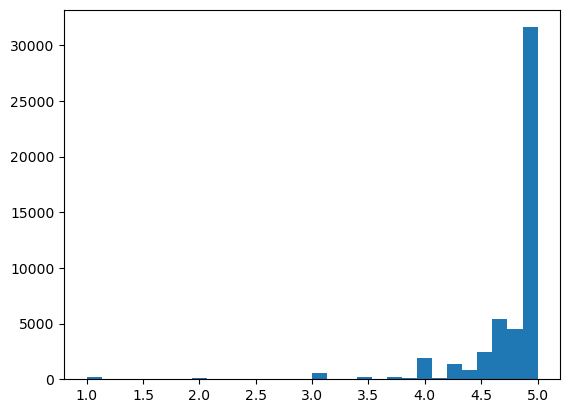

In [291]:
#check distribution of average_rating_of_driver
df_part3['avg_rating_by_driver'].value_counts()
#plot a histogram
import matplotlib.pyplot as plt
plt.hist(df_part3['avg_rating_by_driver'].dropna(), bins=30)
plt.show()

In [292]:
df_part3['avg_rating_by_driver'].describe()

count    49799.000000
mean         4.778158
std          0.446652
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

Mean = 4.77 and Median/Mode = 5, since it is a continuous value, its safe to populate with mean.

#### 2.1 Impute `avg_rating_by_driver` with mean

In [293]:
mean_avg_rating = df_part3['avg_rating_by_driver'].mean()
df_part3.fillna({'avg_rating_by_driver': mean_avg_rating}, inplace=True)

In [294]:
df_part3['phone'].value_counts(normalize=True)

phone
iPhone     0.697162
Android    0.302838
Name: proportion, dtype: float64

#### 2.2 Impute `phone` with mode

Clearly mode is Iphone, so lets impute the missing values with iPhone.

In [295]:
mode_phone = df_part3['phone'].mode()[0]
df_part3.fillna({'phone': mode_phone}, inplace=True)

## 3. EDA

#### 3.1 Evaluate missingness of `average_rating_of_driver`

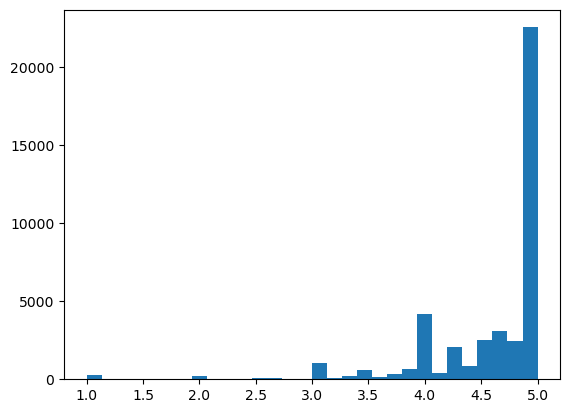

In [296]:
#check distribution of average_rating_of_driver
#plot a histogram
import matplotlib.pyplot as plt
plt.hist(df_part3['avg_rating_of_driver'].dropna(), bins=30)
plt.show()

In [297]:
#group missing values of avg_rating_of_driver by all other variables to see if there are any patterns
df_part3['avg_rating_of_driver_missing'] = df_part3['avg_rating_of_driver'].isnull().astype(int)
missing_avg_rating = df_part3[df_part3['avg_rating_of_driver_missing'] == 1]
non_missing_avg_rating = df_part3[df_part3['avg_rating_of_driver_missing'] == 0]
missing_avg_rating.describe()


,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,avg_rating_of_driver_missing
count,8122.000000,8122,0.0,8122.000000,8122,8122.000000,8122.000000,8122.000000,8122.000000,8122.0
mean,0.593327,2014-01-16 22:06:42.462447360,NaN,1.078210,2014-03-24 11:53:58.315685632,8.548067,59.050948,7.506267,4.785919,1.0
min,0.000000,2014-01-01 00:00:00,NaN,1.000000,2014-01-01 00:00:00,0.000000,0.000000,0.000000,1.000000,1.0
25%,0.000000,2014-01-10 00:00:00,NaN,1.000000,2014-01-26 00:00:00,0.000000,0.000000,2.410000,5.000000,1.0
50%,1.000000,2014-01-18 00:00:00,NaN,1.000000,2014-03-16 00:00:00,0.000000,100.000000,4.715000,5.000000,1.0
75%,1.000000,2014-01-25 00:00:00,NaN,1.000000,2014-05-22 00:00:00,0.000000,100.000000,10.720000,5.000000,1.0
max,5.000000,2014-01-31 00:00:00,NaN,5.000000,2014-07-01 00:00:00,100.000000,100.000000,160.960000,5.000000,1.0
std,0.606755,NaN,NaN,0.310306,NaN,26.578461,46.859739,7.758616,0.619551,0.0


In [298]:
non_missing_avg_rating.describe()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,avg_rating_of_driver_missing
count,41878.000000,41878,41878.000000,41878.000000,41878,41878.000000,41878.000000,41878.000000,41878.000000,41878.0
mean,2.604972,2014-01-16 11:19:08.994699008,4.601559,1.074095,2014-04-24 08:18:23.089928192,8.908004,61.289756,5.465290,4.776653,0.0
min,0.000000,2014-01-01 00:00:00,1.000000,1.000000,2014-01-01 00:00:00,0.000000,0.000000,0.000000,1.000000,0.0
25%,0.000000,2014-01-09 00:00:00,4.300000,1.000000,2014-02-23 00:00:00,0.000000,37.500000,2.420000,4.700000,0.0
50%,1.000000,2014-01-17 00:00:00,4.900000,1.000000,2014-05-16 00:00:00,0.000000,66.700000,3.790000,5.000000,0.0
75%,3.000000,2014-01-24 00:00:00,5.000000,1.070000,2014-06-20 00:00:00,11.100000,100.000000,6.490000,5.000000,0.0
max,125.000000,2014-01-31 00:00:00,5.000000,8.000000,2014-07-01 00:00:00,100.000000,100.000000,79.690000,5.000000,0.0
std,4.055311,NaN,0.617338,0.200861,NaN,18.401140,34.858046,5.151833,0.403462,0.0


From this quick summary we can see that `avg_rating_of_driver` missingness can be attributed to fewer `trips_in_first_30_days` (the maximum number of trips these folks have made is 5 in the past 30 days, with mean as 0.5).

We also notice that the avg_dist of these missing rows is significantly higher than the non-missing rows, this could suggest that they were potentially one time users of Ultimate platforms. We should also do this analysis across categorical features

In [299]:
# compare dataframes missing_avg_rating and non_missing_avg_rating across categorical variables
categorical_vars = ['city', 'phone', 'ultimate_black_user']
for var in categorical_vars:
    print(f"Value counts for {var} in missing_avg_rating:")
    print(missing_avg_rating[var].value_counts(normalize=True))
    print(f"Value counts for {var} in non_missing_avg_rating:")
    print(non_missing_avg_rating[var].value_counts(normalize=True))
    print("\n")

Value counts for city in missing_avg_rating:
city
Winterfell        0.486580
Astapor           0.355454
King's Landing    0.157966
Name: proportion, dtype: float64
Value counts for city in non_missing_avg_rating:
city
Winterfell        0.462868
Astapor           0.325875
King's Landing    0.211257
Name: proportion, dtype: float64


Value counts for phone in missing_avg_rating:
phone
iPhone     0.644423
Android    0.355577
Name: proportion, dtype: float64
Value counts for phone in non_missing_avg_rating:
phone
iPhone     0.710254
Android    0.289746
Name: proportion, dtype: float64


Value counts for ultimate_black_user in missing_avg_rating:
ultimate_black_user
False    0.66326
True     0.33674
Name: proportion, dtype: float64
Value counts for ultimate_black_user in non_missing_avg_rating:
ultimate_black_user
False    0.615096
True     0.384904
Name: proportion, dtype: float64




We notice that there could be a relationship between `avg_rating_of_driver` to `phone` as well. From our above observations we need to keep our missing values as it is since there is a significant trend with our outcome variable `trips_in_first_30_days`

In [300]:
#drop the missing indicator column
df_part3.drop(columns=['avg_rating_of_driver_missing'], inplace=True)

### Since our aim is to predict customer retention, let's introduce a new categoriacal `customer_retention` variable that is assigned based on `trips_in_first_30_days` , i.e if `trips_in_first_30_days` > 0 then assign 1 else 0

### 3.2 Determine Target Variable

In [301]:
#add new variable customer_retention based on trips_in_first_30_days
df_part3['customer_retention'] = (df_part3['trips_in_first_30_days'] > 0).astype(int)

In [302]:
df_part3.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,customer_retention
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,1


In [303]:
df_part3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
 12  customer_retention      50000 non-null  int64 

In [304]:
#
df_part3['customer_retention'].value_counts(normalize=True)

customer_retention
1    0.6922
0    0.3078
Name: proportion, dtype: float64

### We notice that ~69% of riders were retained by Ultimate and ~31 were not retained based on ground truth data

### 3.3 Plot heatmap to check correlation between features and target variable

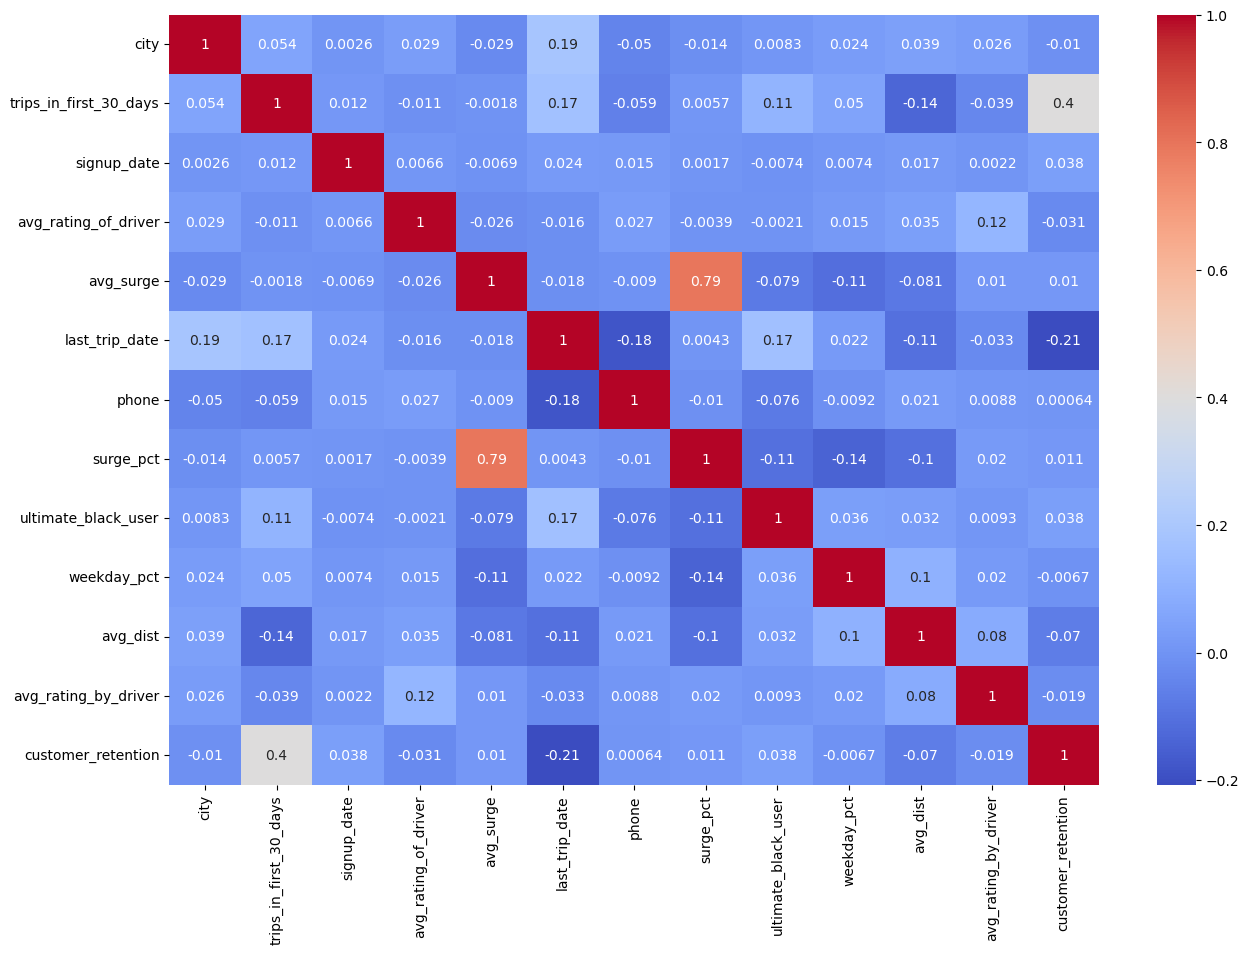

In [305]:
#plot heatmap to see correlation between variables, encode categorical variables to numeric for correlation analysis
df_part3_encoded = df_part3.copy()
df_part3_encoded['city'] = df_part3_encoded['city'].map({'Astapor': 0, 'Winterfell': 1, 'King\'s Landing': 2})
df_part3_encoded['phone'] = df_part3_encoded['phone'].map({'iPhone': 0, 'Android': 1})
df_part3_encoded['ultimate_black_user'] = df_part3_encoded['ultimate_black_user'].astype(int)


import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(df_part3_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()




We observe -

1. `avg_surge` and `surge_pct` are highly correlated (~79%) with each other but have (1%) and (1.1%) with the target variable `customer_retention`, lets drop the one with lower correlation with target variable
2. `trips_in_first_30_days` has (~40%) correlation to `customer_retention`, it is moderate relationship and can assist our predictive model. We also notice it is not correlated to other features and doesn't introduce the problem of multicollinearity to the model

In [306]:
df_part3_encoded.drop(columns=['avg_surge'], inplace=True)
df_part3.drop(columns=['avg_surge'], inplace=True)

In [307]:
df_part3_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  int64         
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   last_trip_date          50000 non-null  datetime64[ns]
 5   phone                   50000 non-null  int64         
 6   surge_pct               50000 non-null  float64       
 7   ultimate_black_user     50000 non-null  int64         
 8   weekday_pct             50000 non-null  float64       
 9   avg_dist                50000 non-null  float64       
 10  avg_rating_by_driver    50000 non-null  float64       
 11  customer_retention      50000 non-null  int64         
dtypes: datetime64[ns](2), float64(5), int64(5)
mem

In [308]:
df_part3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   last_trip_date          50000 non-null  datetime64[ns]
 5   phone                   50000 non-null  object        
 6   surge_pct               50000 non-null  float64       
 7   ultimate_black_user     50000 non-null  bool          
 8   weekday_pct             50000 non-null  float64       
 9   avg_dist                50000 non-null  float64       
 10  avg_rating_by_driver    50000 non-null  float64       
 11  customer_retention      50000 non-null  int64         
dtypes: bool(1), datetime64[ns](2), float64(5), int

## 4. Feature Engineering + Predictive Modeling

### 4.1 Baseline Model - Logistic Regression + Simple Imputation (Missing Indicator)

Baseline 1: Simple Logistic Regression

Because:

1. It’s interpretable, 
2. Works well as a starting pointHandles binary targets naturally
3. Good for evaluating feature importance and effects

Handling missingness (MAR):

1. Create a missingness indicator: X1_missing = 1 if X1 is missing
2. Impute missing X1 (mean/median or model-based)
3. Include both X1 and X1_missing in the model

What to Avoid (Logistic Regression)

❌ Feeding raw categorical strings
❌ Not scaling numerical features
❌ Keeping redundant highly correlated variables (multicollinearity)
❌ Imputing blindly without modeling missingness
❌ Ignoring skewness / nonlinearity

#### 4.1.1 Handlle Missing Values in `avg_rating_of_driver`

In [309]:
df_part3_encoded['avg_rating_of_driver_missing'] = df_part3_encoded['avg_rating_of_driver'].isna().astype(int)
df_part3_encoded['avg_rating_of_driver'] = df_part3_encoded['avg_rating_of_driver'].fillna(df_part3_encoded['avg_rating_of_driver'].mean())


In [310]:
df_part3_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   city                          50000 non-null  int64         
 1   trips_in_first_30_days        50000 non-null  int64         
 2   signup_date                   50000 non-null  datetime64[ns]
 3   avg_rating_of_driver          50000 non-null  float64       
 4   last_trip_date                50000 non-null  datetime64[ns]
 5   phone                         50000 non-null  int64         
 6   surge_pct                     50000 non-null  float64       
 7   ultimate_black_user           50000 non-null  int64         
 8   weekday_pct                   50000 non-null  float64       
 9   avg_dist                      50000 non-null  float64       
 10  avg_rating_by_driver          50000 non-null  float64       
 11  customer_retention          

#### 4.1.4 Extract `signup_date` month and `last_trip_date` month

In [311]:
#extract `signup_date` month and `last_trip_date` month
df_part3_encoded['signup_month'] = df_part3_encoded['signup_date'].dt.month
df_part3_encoded['last_trip_month'] = df_part3_encoded['last_trip_date'].dt.month
#drop the original date columns
df_part3_encoded.drop(columns=['signup_date', 'last_trip_date'], inplace=True)

#### 4.1.2 Check for skewed features

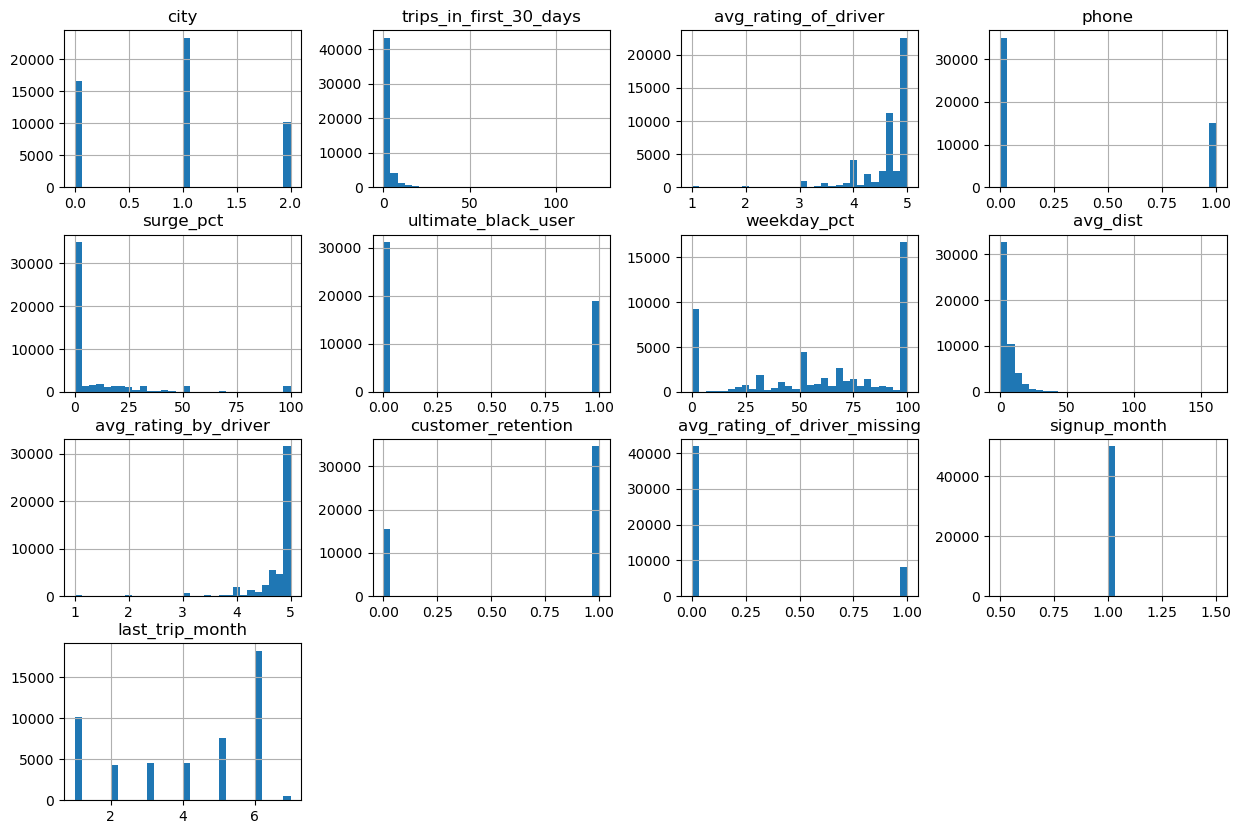

In [312]:
#check for skewed features
df_part3_encoded.hist(bins=30, figsize=(15, 10))
plt.show()

In [313]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# Define a log transformation function (add 1 to avoid log(0))
log_transformer = FunctionTransformer(lambda x: np.log1p(x), validate=True)

numeric_features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct', 'signup_month']
categorical_features = ['phone', 'city', 'ultimate_black_user', 'avg_rating_of_driver_missing', 'last_trip_month']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('log', log_transformer),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

# Define your important features (example list)
important_features = numeric_features + categorical_features

# Prepare X and y
X = df_part3_encoded[important_features]
y = df_part3_encoded['customer_retention']

# Train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Fit the pipeline
clf.fit(X_train, y_train)

# Predict probabilities and labels
y_pred_proba = clf.predict_proba(X_test)[:, 1]
y_pred = clf.predict(X_test)

# Evaluate
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Get categorical feature names from OneHotEncoder
cat_feature_names = clf.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_features)

# Numeric features (after log/scaler) keep their original names
num_feature_names = numeric_features

# Combine
feature_names = np.concatenate([num_feature_names, cat_feature_names])

# Get importances
importance = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)


ROC AUC Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3078
           1       1.00      1.00      1.00      6922

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



AttributeError: 'Pipeline' object has no attribute 'coef_'

## Interpretation of Baseline Model

Collecting workspace informationYou built a predictive model to determine whether a user will be active in their 6th month (customer retention) using the Ultimate dataset. My approach involved:

- **Data Cleaning & Imputation:**  
  - Imputed missing values for `avg_rating_by_driver` (mean) and `phone` (mode).
  - For `avg_rating_of_driver` (~16% missing), you analyzed missingness and included a missingness indicator for modeling.

- **Feature Engineering:**  
  - Created a binary target variable `customer_retention` (active in 6th month).
  - Encoded categorical variables (`city`, `phone`, `ultimate_black_user`) numerically.
  - Dropped highly correlated features (`avg_surge`).

- **Modeling:**  
  - Used a logistic regression pipeline with log transformation and scaling for numeric features, and one-hot encoding for categorical features.
  - Included missingness indicators to handle MAR (Missing At Random) data.

- **Alternatives Considered:**  
  - Advanced imputation (KNN, MICE), tree-based models (Random Forest/XGBoost), and regression imputation.
  - You chose logistic regression for interpretability and baseline comparison.

- **Model Validity & Performance:**  
  - Evaluated using ROC AUC and classification report (precision, recall, f1-score).
  - Stratified train/test split to ensure balanced classes.
  - Feature importance extracted to interpret model drivers.

**Concerns:**  
- Potential bias from imputation, especially for variables with >10% missingness.
- Model assumes MAR; if missingness is MNAR, results may be biased.
- Logistic regression may not capture nonlinear relationships.

**Key Indicators:**  
- ROC AUC Score (reported in output).
- Classification report (precision, recall, f1-score for retained/not retained).
- Feature importance ranking.

My model is valid as a baseline and interpretable, but further validation (cross-validation, alternative models, deeper missingness analysis) is recommended for production use.


### Long Term Planning

Ultimate can use the model’s insights to identify key factors driving rider retention, such as trip frequency, ratings, and city-specific behaviors. By targeting users who are less likely to be retained—through personalized incentives, improved driver matching, or tailored communication—Ultimate can proactively address churn risks. Additionally, understanding which features most influence retention allows Ultimate to refine onboarding, loyalty programs, and service quality, ultimately improving long-term rider engagement and retention.


### 4.2 Simple XGBoost Model

In [330]:
df_part3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   last_trip_date          50000 non-null  datetime64[ns]
 5   phone                   50000 non-null  object        
 6   surge_pct               50000 non-null  float64       
 7   ultimate_black_user     50000 non-null  bool          
 8   weekday_pct             50000 non-null  float64       
 9   avg_dist                50000 non-null  float64       
 10  avg_rating_by_driver    50000 non-null  float64       
 11  customer_retention      50000 non-null  int64         
dtypes: bool(1), datetime64[ns](2), float64(5), int

In [ ]:
# create a XGBoost model and compare results with logistic regression
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Only impute missing values and encode categoricals
categorical_features_xgb = ['phone', 'city', 'ultimate_black_user']

categorical_transformer_xgb = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))
])

preprocessor_xgb = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer_xgb, categorical_features_xgb)
    ]
)

xgb_clf = Pipeline(steps=[
    ('preprocessor', preprocessor_xgb),
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# use original dataset = df_part3 and generate X and y again
X_xgb = df_part3[df_part3.columns.difference(['customer_retention'])]
y_xgb = df_part3['customer_retention']

# Train/test split with stratification
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(
    X_xgb, y_xgb, test_size=0.2, stratify=y_xgb, random_state=42
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   avg_dist                50000 non-null  float64       
 1   avg_rating_by_driver    50000 non-null  float64       
 2   avg_rating_of_driver    41878 non-null  float64       
 3   city                    50000 non-null  object        
 4   last_trip_date          50000 non-null  datetime64[ns]
 5   phone                   50000 non-null  object        
 6   signup_date             50000 non-null  datetime64[ns]
 7   surge_pct               50000 non-null  float64       
 8   trips_in_first_30_days  50000 non-null  int64         
 9   ultimate_black_user     50000 non-null  bool          
 10  weekday_pct             50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(5), int64(1), object(2)
memory usage: 3.9+ MB


In [334]:
# Fit the pipeline on training data
xgb_clf.fit(X_train_xgb, y_train_xgb)
y_pred_proba_xgb = xgb_clf.predict_proba(X_test_xgb)[:, 1]
y_pred_xgb = xgb_clf.predict(X_test_xgb)
print("XGBoost ROC AUC Score:", roc_auc_score(y_test_xgb, y_pred_proba_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test_xgb, y_pred_xgb))

# After fitting xgb_clf
feature_names = xgb_clf.named_steps['preprocessor'].get_feature_names_out()
xgb_importance = xgb_clf.named_steps['classifier'].feature_importances_

print("Feature names length:", len(feature_names))
print("Importances length:", len(xgb_importance))

xgb_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_importance
})
xgb_feature_importance = xgb_feature_importance.sort_values(by='Importance', ascending=False)
print(xgb_feature_importance)



XGBoost ROC AUC Score: 0.5359387505329506
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3078
           1       0.69      1.00      0.82      6922

    accuracy                           0.69     10000
   macro avg       0.35      0.50      0.41     10000
weighted avg       0.48      0.69      0.57     10000

Feature names length: 4
Importances length: 4
                         Feature  Importance
2           cat__city_Winterfell    0.689735
3  cat__ultimate_black_user_True    0.236151
1       cat__city_King's Landing    0.068878
0              cat__phone_iPhone    0.005236


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:16:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarni

# Extra Notes

some of the variables `trips_in_first_30_days` , `surge_pct`, `avg_dist`, `avg_rating_by_driver`, `avg_rating_of_driver` are skewed, so lets take log transformations of these and drop the original features for Logistic Regression Base model

In [ ]:
# # take log transformations of these and drop the original features for Logistic Regression Base model
# import numpy as np
# df_part3_encoded['log_trips_in_first_30_days'] = np.log1p(df_part3_encoded['trips_in_first_30_days'])
# df_part3_encoded['log_surge_pct'] = np.log1p(df_part3_encoded['surge_pct'])
# df_part3_encoded['log_avg_dist'] = np.log1p(df_part3_encoded['avg_dist'])
# df_part3_encoded['log_avg_rating_by_driver'] = np.log1p(df_part3_encoded['avg_rating_by_driver'])
# df_part3_encoded['log_avg_rating_of_driver'] = np.log1p(df_part3_encoded['avg_rating_of_driver'])

# df_part3_encoded.info()
# df_part3_encoded.drop(columns=['trips_in_first_30_days', 'surge_pct', 'avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver'], inplace=True)


#### 4.1.3 One-hot encoding nominal categorical features

In [ ]:
#one-hot encoding nominal categorical features and drop the original columns to avoid dummy variable trap
# df_part3_encoded = pd.get_dummies(df_part3_encoded, columns=['city', 'phone', 'ultimate_black_user'], drop_first=True)



In [ ]:
# df_part3_encoded.info()

In [ ]:
# df_part3_encoded.info()

In [ ]:
# #plot histogram of all features to check for skewness again
# df_part3_encoded.hist(bins=30, figsize=(15, 10))
# plt.show()

#### 4.1.4 Build base logistic regression model

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import roc_auc_score
# #Scale the features using StandardScaler
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_part3_encoded[df_part3_encoded.columns.difference(['customer_retention'])] = scaler.fit_transform(df_part3_encoded[df_part3_encoded.columns.difference(['customer_retention'])])

# X = df_part3_encoded[df_part3_encoded.columns.difference(['customer_retention'])]  
# y = df_part3_encoded['customer_retention']

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# model = LogisticRegression(max_iter=1000)
# model.fit(X_train, y_train)

# preds = model.predict_proba(X_test)[:, 1]
# roc_auc = roc_auc_score(y_test, preds)
# print(f"ROC AUC Score: {roc_auc}")


In [ ]:
# #show other metrics like confusion matrix, classification report
# from sklearn.metrics import confusion_matrix, classification_report
# y_pred = model.predict(X_test)
# cm = confusion_matrix(y_test, y_pred)
# cr = classification_report(y_test, y_pred)
# print("Confusion Matrix:")
# print(cm)

## NOTE 1: general pricinples on Handling Missing values

### Analyzing Impact of Missingness (>10%)

### 1. **Analyze Impact**
- **Check if missingness is random:**  
  - Use missingness indicator (`isnull()`) and compare with other variables (see if missingness is related to outcome or predictors).
  - Use statistical tests (Chi-square for categorical, t-test/ANOVA for continuous).
- **Compare distributions:**  
  - Compare summary statistics and distributions of other variables for missing vs. non-missing groups.
- **Model missingness:**  
  - Build a model to predict missingness using other features. If prediction is good, missingness is not random.

### 2. **Advanced Imputation Methods**

#### **For Continuous Variables**
- **KNN Imputation:**  
  - Impute missing values using the mean of k-nearest neighbors.
  - Good for data with similar patterns among samples.
  - Use `sklearn.impute.KNNImputer`.

- **Regression Imputation:**  
  - Predict missing values using regression models trained on non-missing data.
  - Can use linear regression or more complex models.

- **Multiple Imputation (MICE):**  
  - Iteratively imputes missing values using chained equations.
  - Accounts for uncertainty by creating multiple imputed datasets.
  - Use `statsmodels.imputation.mice` or `fancyimpute`.

#### **For Categorical Variables**
- **Mode Imputation:**  
  - Impute with most frequent value (only if missingness is random and % is not too high).
- **Predictive Imputation:**  
  - Use classification models (e.g., logistic regression, decision trees) to predict missing category.
- **MICE for categorical:**  
  - MICE can also handle categorical variables using logistic regression or similar methods.

#### **For Time Series**
- **Interpolation:**  
  - Use linear, polynomial, or spline interpolation for missing values.
- **Forward/Backward Fill:**  
  - Fill missing values with previous or next observed value (useful for ordered data).

### 3. **Type of Problem Statement**

- **Prediction/Classification:**  
  - Imputation should not introduce bias that affects target variable.
  - Advanced methods (KNN, MICE) preserve relationships between features.
  - If missingness is related to target, consider including missingness indicator as a feature.

- **Clustering/Unsupervised:**  
  - Imputation should preserve natural groupings.
  - KNN or MICE are preferred over mean/mode.

### 4. **Choosing the Right Model**

- **Tree-based models (Random Forest, XGBoost):**  
  - Can handle missing values natively or with missingness indicators.
  - Less sensitive to imputation method.

- **Linear models (Logistic/Linear Regression):**  
  - Require complete data; imputation method can affect results.
  - Advanced imputation (MICE, regression) is preferred.

- **Deep Learning:**  
  - Requires complete data; use advanced imputation or mask missing values.

**Summary:**  
- For >10% missingness, always analyze if missingness is random and its impact.
- Use advanced imputation (KNN, MICE, regression) for continuous; predictive/classification for categorical.
- Choose models that are robust to imputation or include missingness indicators if appropriate.

## NOTE 2: Missingness Types + Examples

| Type     | Full Form                    | Meaning                                                                                             | Example                                                                                                     |
| -------- | ---------------------------- | --------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------- |
| **MCAR** | Missing Completely At Random | Missingness is **completely unrelated** to any variable, observed or unobserved.                    | A sensor randomly fails 5% of the time for no reason.                                                       |
| **MAR**  | Missing At Random            | Missingness is **related to other observed variables**, but **not** to the missing variable itself. | People with low education are less likely to report income. Once you know education, missingness is random. |
| **MNAR** | Missing Not At Random        | Missingness is **related to the missing variable itself** (or unobserved factors).                  | High-income people hide their income; missingness depends on income itself.                                 |
